# Simulator

# Pre-processing Data

In [ ]:
# Mengubah .log ke .csv
import csv
from datetime import datetime

# Ganti path_file_log dengan path file teks yang sesuai
path_file_txt = 'path:\\folder\\input.log'

# Ganti path_file_csv dengan path file CSV yang dihasilkan
path_file_csv = 'path:\\folder\\output.csv'

# Nama kolom yang diinginkan
column_names = ["ip_address", "timestamp", "request_method", "path", "status_code", "response_size", "referrer", "user_agent"]

with open(path_file_txt, 'r') as file_txt, open(path_file_csv, 'w', newline='') as file_csv:
    csv_writer = csv.writer(file_csv)
    csv_writer.writerow(column_names)

    for line in file_txt:
        # Pisahkan setiap elemen dalam baris menggunakan spasi
        elements = line.strip().split()

        # Pastikan jumlah elemen mencukupi sebelum mencoba mengakses indeks tertentu
        if len(elements) >= 12:
            ip_address = elements[0]
            timestamp_str = f"{elements[3]} {elements[4]}"
            timestamp = datetime.strptime(timestamp_str, "[%d/%b/%Y:%H:%M:%S %z]")
            request_method = elements[5][1:] if elements[5] != '"-"' else ""
            path = elements[6] if elements[6] != '"-"' else ""
            status_code = elements[8]
            response_size = elements[9]
            referrer = elements[10] if elements[10] != '"-"' else ""
            user_agent = " ".join(elements[11:]) if len(elements) > 11 else ""

            # Tulis baris baru ke file CSV
            csv_writer.writerow([ip_address, timestamp, request_method, path, status_code, response_size, referrer, user_agent])
        else:
            print(f"Jumlah elemen dalam baris tidak mencukupi: {line}")

print(f"File CSV berhasil dibuat: {path_file_csv}")

In [ ]:
#cleaning data
import pandas as pd

# Membaca file CSV
csv_file_path = 'path:\\folder\\output.csv'
df = pd.read_csv(csv_file_path)

# Menampilkan informasi umum tentang data
print("Info sebelum data cleaning:")
print(df.info())

# Menghapus duplikat (jika ada)
df = df.drop_duplicates()

# Menangani nilai-nilai yang hilang
df = df.dropna()

# Mengonversi kolom timestamp menjadi tipe data datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%b/%Y:%H:%M:%S %z')

# Menyimpan kembali ke file CSV setelah data cleaning
cleaned_csv_path = 'path:\\folder\\cleaning\\output.csv'
df.to_csv(cleaned_csv_path, index=False)

# Menampilkan informasi setelah data cleaning
print("\nInfo setelah data cleaning:")
print(df.info())

In [ ]:
# Mencari rata-rata request per jam
import pandas as pd
import matplotlib.pyplot as plt

# Daftar nama file CSV
file_paths = ['path:\\folder\\cleaning\\output.csv',
             'path:\\folder\\cleaning\\output2.csv',
             'path:\\folder\\cleaning\\output3.csv']

# Membaca data dari setiap file dan menghitung jumlah permintaan per jam
requests_per_hour = {}
for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df = df.dropna(subset=['timestamp'])
    df['hour'] = df['timestamp'].dt.hour
    requests_per_hour[f'File_{i}'] = df.groupby('hour').size()

# Gabungkan data dari semua file
combined_requests = pd.concat(requests_per_hour.values(), axis=1).sum(axis=1)

# Hitung total permintaan gabungan
total_requests = combined_requests.sum()

# Hitung rata-rata permintaan per jam dari data gabungan
average_requests_per_hour = combined_requests / len(requests_per_hour)

# Hitung persentase permintaan per jam dari total permintaan
percentage_requests_per_hour = (combined_requests / total_requests) * 100

# Visualisasikan rata-rata permintaan per jam dalam bentuk histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(average_requests_per_hour.index, average_requests_per_hour, color='skyblue', width=0.6)

plt.title('Rata-rata Permintaan per Jam Domain\n tanggal - tanggal')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Permintaan')
plt.grid(axis='y')

# Menambahkan keterangan jam di bawah setiap batang histogram
plt.gca().xaxis.set_ticks(range(len(average_requests_per_hour)))
plt.gca().xaxis.set_ticklabels(average_requests_per_hour.index)

# Menambahkan label di atas atau di dalam batang histogram
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Visualisasikan persentase permintaan per jam dalam bentuk histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(percentage_requests_per_hour.index, percentage_requests_per_hour, color='salmon', width=0.6)

plt.title('Persentase Permintaan per Jam\n tanggal - tanggal')
plt.xlabel('Jam')
plt.ylabel('Persentase Permintaan')
plt.grid(axis='y')

# Menambahkan keterangan jam di bawah setiap batang histogram
plt.gca().xaxis.set_ticks(range(len(percentage_requests_per_hour)))
plt.gca().xaxis.set_ticklabels(percentage_requests_per_hour.index)

# Menambahkan label di atas batang histogram
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Menghitung dan menambahkan interval_arival ke file csv
import pandas as pd

# Membaca file CSV yang telah dibersihkan
csv_path = 'path:\\folder\\cleaning\\output.csv'
df = pd.read_csv(csv_path, low_memory=False)

# Mengkonversi kolom timestamp menjadi tipe data datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S%z')

# Mengurutkan DataFrame berdasarkan timestamp
df = df.sort_values(by='timestamp')

# Menghitung interval kedatangan dalam detik
df['interval_arrival'] = df['timestamp'].diff().dt.total_seconds()

# Menyimpan DataFrame yang telah diupdate ke file CSV dengan menambahkan kolom baru
df.to_csv(csv_path, index=False)

In [ ]:
# Melihat banyak data dalam file CSV
import pandas as pd

# Membaca file CSV
csv_file_path = 'path:\\folder\\cleaning\\output.csv'
df = pd.read_csv(csv_file_path)

# Menampilkan jumlah baris dan kolom
print("\nDimensi Data:")
print(df.shape)

# Menampilkan informasi umum tentang data
print("\nInformasi Data:")
print(df.info())

In [ ]:
# Melihat distribusi status code domain
import pandas as pd
import os
import matplotlib.pyplot as plt

# Daftar nama file CSV
file_paths = ['path:\\folder\\cleaning\\output.csv',
             'path:\\folder\\cleaning\\output2.csv',
             'path:\\folder\\cleaning\\output3.csv'
              ]
# Ganti dengan path ke masing-masing file CSV Anda

# Membaca data dari setiap file dan menggabungkannya menjadi satu DataFrame
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

# Menghitung jumlah keseluruhan status code dalam gabungan semua file
total_status_codes = len(combined_df['status_code'])

# Menghitung jumlah masing-masing status code
status_code_counts = combined_df['status_code'].value_counts()

# Menghitung persentase masing-masing status code
status_code_percentages = {}
for status_code, count in status_code_counts.items():
    percentage = (count / total_status_codes) * 100
    status_code_percentages[status_code] = percentage
    
# Menampilkan hasil
print("Status Code:")
for status_code, percentage in status_code_percentages.items():
    print(f"{status_code}: {percentage:.2f}%")

# Filter status code yang valid
valid_status_codes = {str(code): count for code, count in status_code_counts.items() if isinstance(code, int)}

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(valid_status_codes.values(), startangle=140)
plt.title('Status Code\n tanggal - tanggal')
plt.axis('equal')  # Ensure the pie is drawn as a circle

# Add legend
legend_texts = [f"{status_code}: {count} ({percentage:.2f}%)"
                for status_code, count, percentage in zip(valid_status_codes.keys(),
                                                            valid_status_codes.values(),
                                                            status_code_percentages.values())]
plt.legend(legend_texts, loc='lower left')

# Show the plot
plt.show()

In [ ]:
# Melihat distribusi interval arrival
import pandas as pd

# Daftar nama file CSV
file_paths = ['path:\\folder\\cleaning\\output.csv',
             'path:\\folder\\cleaning\\output2.csv',
             'path:\\folder\\cleaning\\output3.csv']
# Ganti dengan path ke masing-masing file CSV Anda

# Membaca data dari setiap file dan menggabungkannya
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path, low_memory=False)
    dfs.append(df)

combined_df = pd.concat(dfs)

# Menghitung jumlah total data
total_data = len(combined_df)

# Menghitung jumlah permintaan dan persentasenya untuk setiap interval kedatangan
interval_counts = combined_df['interval_arrival'].value_counts()

# Menghitung rata-rata permintaan
average_requests = total_data / len(interval_counts)

print("Interval Arrival\tJumlah Permintaan\tPersentase")
print("-------------------------------------------------")
for interval, count in interval_counts.items():
    percentage = (count / total_data) * 100
    print(f"{interval}\t\t\t{count}\t\t\t{percentage:.2f}%")

In [ ]:
# Melihat persentase request method
import pandas as pd
import os
import matplotlib.pyplot as plt

# Daftar nama file CSV
file_paths = ['path:\\folder\\cleaning\\output.csv',
             'path:\\folder\\cleaning\\output2.csv',
             'path:\\folder\\cleaning\\output3.csv']
# Ganti dengan path ke masing-masing file CSV Anda

# Membaca data dari setiap file dan menggabungkannya menjadi satu DataFrame
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

# Filter hanya method request yang valid (GET, POST, HEAD, OPTIONS)
valid_request_methods = ['GET', 'POST', 'HEAD', 'OPTIONS'] #sesuaikan dengan distribusi data Anda
combined_df = combined_df[combined_df['request_method'].isin(valid_request_methods)]

# Menghitung jumlah keseluruhan request method yang valid
total_request_method = len(combined_df)

# Menghitung jumlah masing-masing request method
request_method_counts = combined_df['request_method'].value_counts()

# Menghitung persentase masing-masing request method
request_method_percentages = {}
for request_method, count in request_method_counts.items():
    percentage = (count / total_request_method) * 100
    request_method_percentages[request_method] = percentage

# Plot pie chart untuk request method
plt.figure(figsize=(8, 8))
plt.pie(request_method_counts, startangle=140)
plt.title('Request Method\n tanggal - tanggal')
plt.axis('equal')  # Ensure the pie is drawn as a circle

# Add legend
legend_texts = [f"{method}: {count} ({percentage:.2f}%)"
                for method, count, percentage in zip(request_method_counts.index,
                                                      request_method_counts.values,
                                                      request_method_percentages.values())]
plt.legend(legend_texts, loc='lower left')

# Show the plot
plt.show()

Masukkan durasi simulasi (dalam hari): 2
Masukkan jumlah server: 1
Masukkan nilai lambda (harus positif): 0.5


<IPython.core.display.Javascript object>


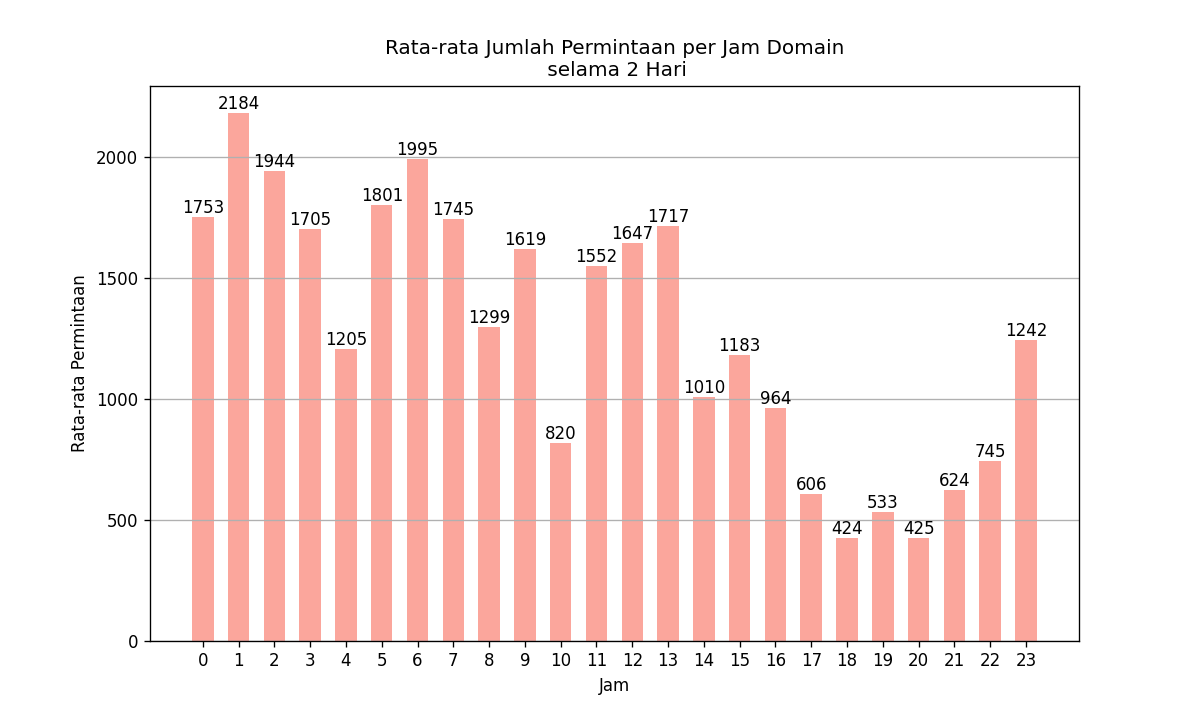

<IPython.core.display.Javascript object>


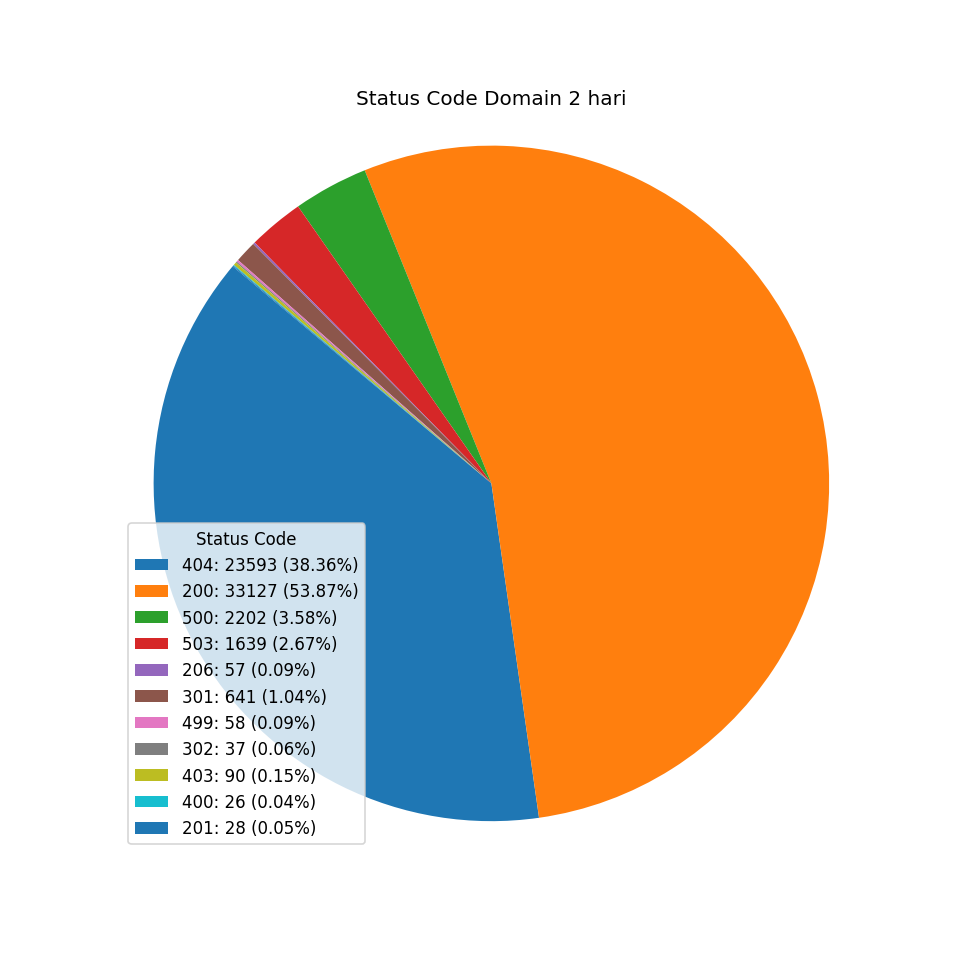

<IPython.core.display.Javascript object>


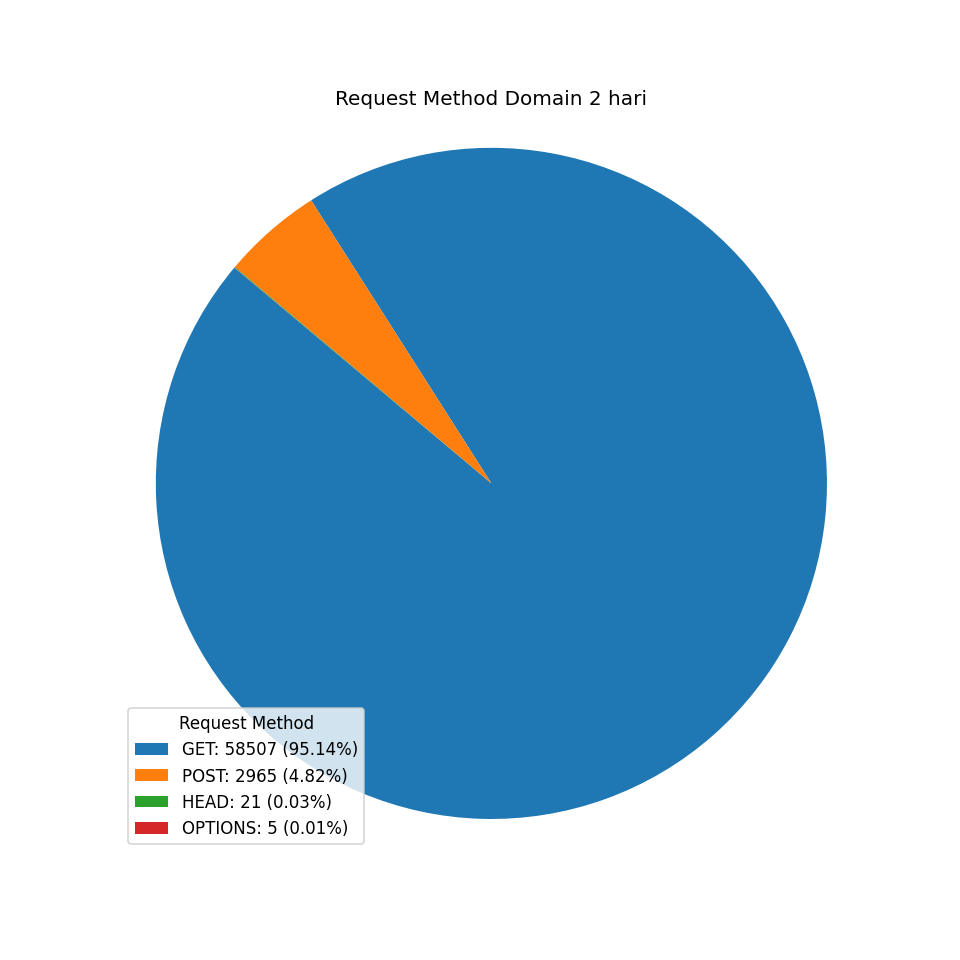

<IPython.core.display.Javascript object>


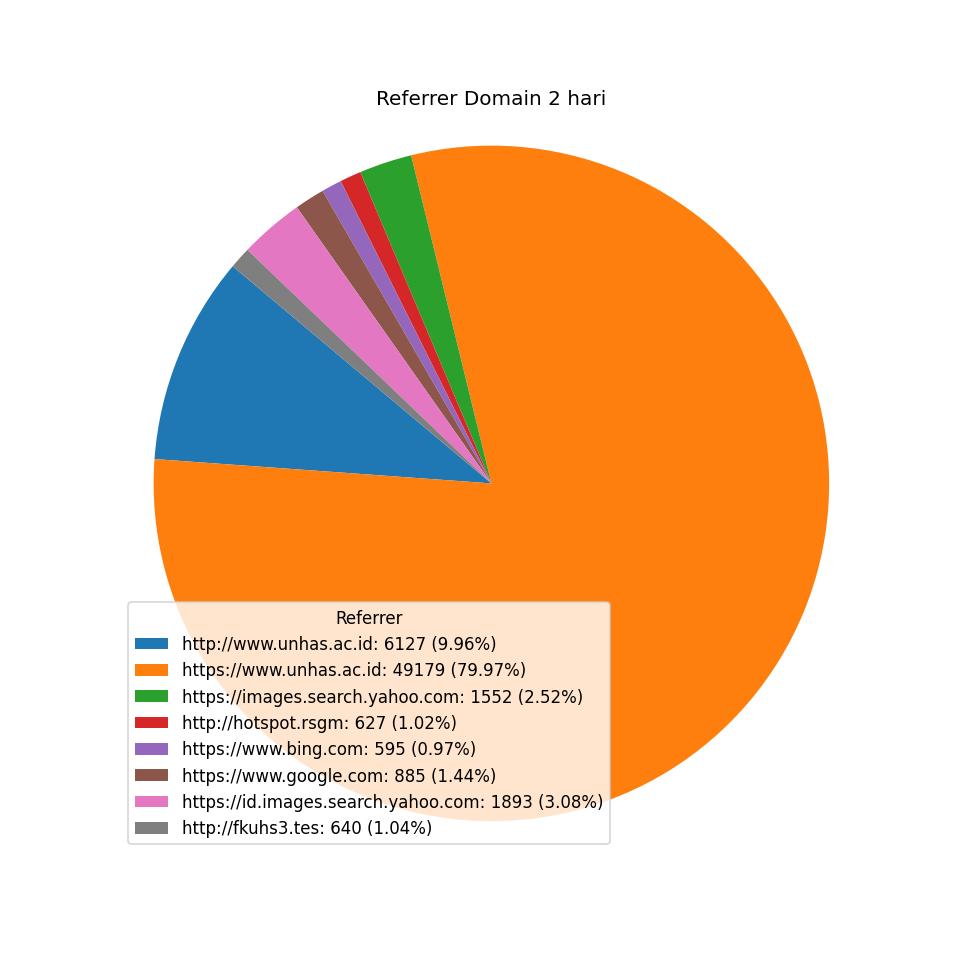

<IPython.core.display.Javascript object>


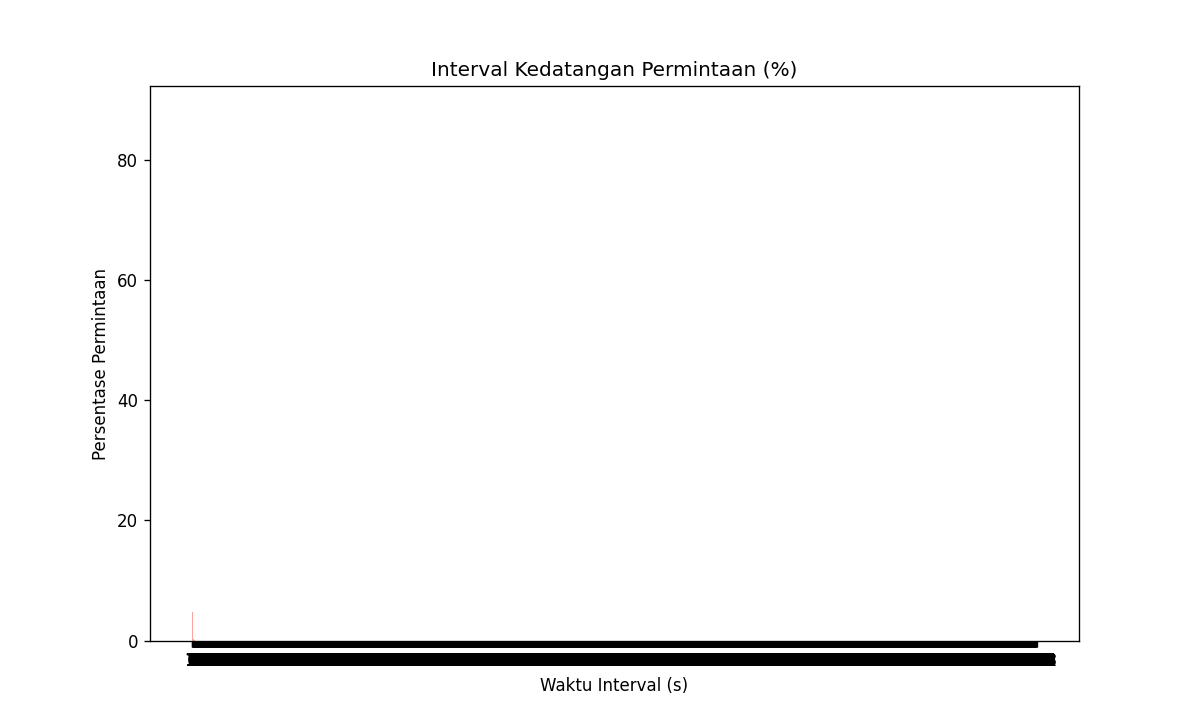

Total Permintaan Keseluruhan: 61498


<IPython.core.display.Javascript object>


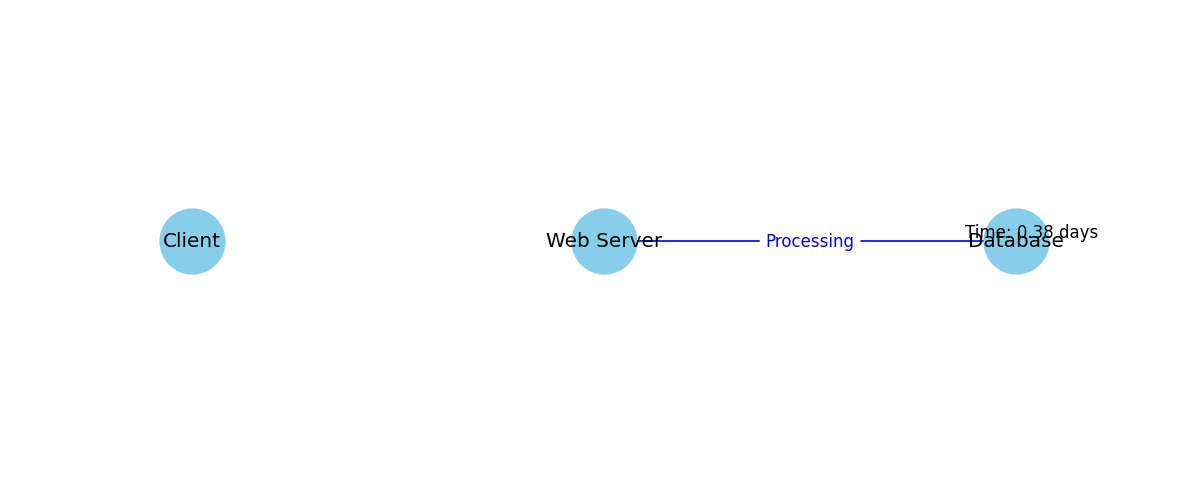

Simulasi selesai.


In [1]:
#simulator web server
%matplotlib notebook
#import library
import simpy
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation
from scipy.stats import expon
from IPython.display import HTML

#pembuatan kelas web server yg merepresentasikan web server dalam menerima requests
class WebServer:
    def __init__(self, env, num_servers, lambda_param):
        self.env = env
        self.requests = []                                                        #menyimpan informasi setiap permintaan
        self.servers = [simpy.Store(env, capacity=1) for _ in range(num_servers)] #membuat `num_servers` dengan kapasitas 1 untuk menyimpan permintaan yang sedang diproses
        self.arrival_times = []                                                   #menyimpan waktu kedatangan setiap permintaan
        self.interval_times = []                                                  #menyimpan interval waktu antara kedatangan permintaan
        self.total_requests = 0                                                   #menghitung jumlah total permintaan yang diterima
        self.requests_per_hour = [0] * 24                                         #menyimpan jumlah permintaan yang diterima setiap jam dalam sehari
        self.requests_per_hour_per_day = [[] for _ in range(24)]                  #menyimpan jumlah permintaan per jam untuk setiap hari
        
        #ganti nilai status code sesuai distribusi data
        self.status_codes = {
            200: 53.90,
            404: 38.18,
            500: 3.64,
            503: 2.62,
            301: 1.07,
            403: 0.15,
            499: 0.09,
            206: 0.08,
            302: 0.06,
            400: 0.05,
            201: 0.04
        }
        
        #ganti nilai request methods sesuai distribusi data
        self.request_methods = {
            'GET': 95.18,
            'POST': 4.76,
            'HEAD': 0.04,
            'OPTIONS': 0.01
        }
        
        #ganti nilai referrer sesuai distribusi data
        self.referrers = {
            'https://www.unhas.ac.id': 80,
            'http://www.unhas.ac.id': 10,
            'https://id.images.search.yahoo.com': 3,
            'https://images.search.yahoo.com': 2.5,
            'https://www.google.com': 1.5,
            'http://hotspot.rsgm': 1,
            'http://fkuhs3.tes': 1,
            'https://www.bing.com': 1
        }
        
        total_prob = sum(self.status_codes.values())
        self.status_probabilities = {code: prob / total_prob for code, prob in self.status_codes.items()}

        total_prob_method = sum(self.request_methods.values())
        self.request_method_probabilities = {method: prob / total_prob_method for method, prob in self.request_methods.items()}

        total_prob_referrer = sum(self.referrers.values())
        self.referrer_probabilities = {referrer: prob / total_prob_referrer for referrer, prob in self.referrers.items()}

        self.status_code_counts = {}
        self.request_method_counts = {}
        self.referrer_counts = {}
    
    def process_request(self, request, server_index):
        with self.servers[server_index].put(request):         #algoritma penjadwalan bisa digunakan di sini
            if len(self.arrival_times) > 0:
                interval_time = self.env.now - self.arrival_times[-1]
                self.interval_times.append(interval_time)
            self.total_requests += 1
            self.arrival_times.append(self.env.now)

            hour = int((self.env.now % (24 * 3600)) // 3600)  #menghitung jam dalam rentang 0-23
            self.requests_per_hour[hour] += 1

            day = int(self.env.now // (24 * 3600))            #menghitung jumlah hari dari waktu lingkungan saat ini (self.env.now) dalam detik
            while len(self.requests_per_hour_per_day[hour]) <= day:
                self.requests_per_hour_per_day[hour].append(0)
            self.requests_per_hour_per_day[hour][day] += 1

            status_code = np.random.choice(list(self.status_probabilities.keys()), p=list(self.status_probabilities.values()))
            request['status_code'] = status_code
            self.status_code_counts[status_code] = self.status_code_counts.get(status_code, 0) + 1

            method = np.random.choice(list(self.request_method_probabilities.keys()), p=list(self.request_method_probabilities.values()))
            request['method'] = method
            self.request_method_counts[method] = self.request_method_counts.get(method, 0) + 1

            referrer = np.random.choice(list(self.referrer_probabilities.keys()), p=list(self.referrer_probabilities.values()))
            request['referrer'] = referrer
            self.referrer_counts[referrer] = self.referrer_counts.get(referrer, 0) + 1

            # Tambahkan informasi permintaan ke dalam list requests
            self.requests.append(request)
            
            #cetak log jika diinginkan
            #print(f"[{self.env.now:.2f}] Server processed request - Status Code: {status_code}, Method: {method}, Referrer: {referrer}")

#pembuatan kelas customer yg merepresentasikan requests yg datang
class Customer:
    def __init__(self, env, web_server, lambda_param):
        self.env = env
        self.web_server = web_server
        self.lambda_param = lambda_param
        
        #ganti nilai rata-rata permintaan per jam sesuai distribusi data
        self.hourly_requests = [
            1735, 2230, 2475, 2235, 1970, 2055, 1990, 2110, 1910, 1625, 1555,
            1720, 1660, 1685, 1545, 1315, 955, 745, 575, 535, 430, 650, 755, 1220
        ]

    def customer_arrival(self, num_servers, end_time, zero_interval_percentage):
        request_id = 0  # Inisialisasi request ID
        while True:
            current_hour = int((self.env.now % (24 * 3600)) / 3600)
            num_requests = np.random.poisson(self.hourly_requests[current_hour]) #distribusi poisson
            for _ in range(num_requests):
                if random.random() < zero_interval_percentage:
                    interval_time = 0
                else:
                    interval_time = expon.rvs(scale=1/self.lambda_param)        #distribusi eksponensial
                yield self.env.timeout(interval_time)

                request = {'id': request_id}
                #cetak log jika diinginkan
                #print(f"[{self.env.now:.2f}] Customer made request - Interval: {interval_time:.2f}")
                
                self.web_server.process_request(request, (len(self.web_server.arrival_times) - 1) % num_servers)
                request_id += 1  
            yield self.env.timeout(3600) 
        
            
def run_simulation(env, simulation_duration, num_servers, lambda_param, zero_interval_percentage):
    web_server = WebServer(env, num_servers, lambda_param)
    customer = Customer(env, web_server, lambda_param)

    end_time = simulation_duration * 24 * 3600
    env.process(customer.customer_arrival(num_servers, end_time, zero_interval_percentage))
    env.run(until=end_time)

    # Hitung rata-rata permintaan per jam selama input hari
    avg_requests_per_hour_days = [sum(day_hour)/len(day_hour) if day_hour else 0
                                          for day_hour in web_server.requests_per_hour_per_day]

    # Visualisasikan rata-rata permintaan per jam selama 30 hari
    plt.figure(figsize=(10, 6))
    plt.bar(range(24), avg_requests_per_hour_days, color='salmon', alpha=0.7, width=0.6 , align='center')
    for i, height in enumerate(avg_requests_per_hour_days):
        plt.text(i, height, f'{int(height)}', ha='center', va='bottom')
    plt.xlabel('Jam')
    plt.ylabel('Rata-rata Permintaan')
    plt.title(f'Rata-rata Jumlah Permintaan per Jam Domain\n selama {simulation_duration} Hari')
    plt.xticks(range(24), range(24))
    plt.grid(axis='y')
    plt.show()

    # Membuat pie chart untuk distribusi status code
    status_code_counts = web_server.status_code_counts
    total_requests = sum(status_code_counts.values())
    percentages_status_code = {code: (count / total_requests) * 100 for code, count in status_code_counts.items()}
    labels_status_code = [str(code) for code in status_code_counts.keys()]
    sizes_status_code = list(status_code_counts.values())
    legend_labels_status_code = [f"{labels_status_code[i]}: {sizes_status_code[i]} ({percentages_status_code[int(labels_status_code[i])]:.2f}%)"
                                 for i in range(len(labels_status_code))]

    plt.figure(figsize=(8, 8))
    plt.pie(sizes_status_code, labels=None, startangle=140, pctdistance=0.85)
    plt.axis('equal')
    plt.title(f'Status Code Domain {simulation_duration} hari')
    plt.legend(legend_labels_status_code, loc='lower left', title='Status Code')
    plt.show()

    # Membuat pie chart untuk distribusi request method
    method_counts = web_server.request_method_counts
    total_requests_method = sum(method_counts.values())
    percentages_method = {method: (count / total_requests_method) * 100 for method, count in method_counts.items()}
    labels_method = list(method_counts.keys())
    sizes_method = list(method_counts.values())
    legend_labels_method = [f"{labels_method[i]}: {sizes_method[i]} ({percentages_method[labels_method[i]]:.2f}%)" for i in range(len(labels_method))]

    plt.figure(figsize=(8, 8))
    plt.pie(sizes_method, labels=None, startangle=140, pctdistance=0.85)
    plt.axis('equal')
    plt.title(f'Request Method Domain {simulation_duration} hari')
    plt.legend(legend_labels_method, loc='lower left', title='Request Method')
    plt.show()

    # Membuat pie chart untuk distribusi referrer
    referrer_counts = web_server.referrer_counts
    total_requests_referrer = sum(referrer_counts.values())
    percentages_referrer = {referrer: (count / total_requests_referrer) * 100 for referrer, count in referrer_counts.items()}
    labels_referrer = list(referrer_counts.keys())
    sizes_referrer = list(referrer_counts.values())
    legend_labels_referrer = [f"{labels_referrer[i]}: {sizes_referrer[i]} ({percentages_referrer[labels_referrer[i]]:.2f}%)" for i in range(len(labels_referrer))]

    plt.figure(figsize=(8, 8))
    plt.pie(sizes_referrer, labels=None, startangle=140, pctdistance=0.85)
    plt.axis('equal')
    plt.title(f'Referrer Domain {simulation_duration} hari')
    plt.legend(legend_labels_referrer, loc='lower left', title='Referrer')
    plt.show()

    if len(web_server.interval_times) > 0:
        interval_counts, bin_edges = np.histogram(web_server.interval_times, bins=np.arange(0, max(web_server.interval_times) + 1, 1))

        #for i, count in enumerate(interval_counts):
            #print(f"Interval {i}: {count} permintaan")

        total_requests = len(web_server.interval_times)

        # Menghitung frekuensi relatif
        relative_frequencies = interval_counts / total_requests * 100

        # Menampilkan histogram dengan frekuensi relatif
        plt.figure(figsize=(10, 6))
        plt.bar(bin_edges[:-1], relative_frequencies, width=1, color='salmon', alpha=0.7)
        plt.xlabel('Waktu Interval (s)')
        plt.ylabel('Persentase Permintaan')
        plt.title('Interval Kedatangan Permintaan (%)')
        plt.xticks(range(int(max(web_server.interval_times)) + 1))
        plt.show()

        # Cetak total permintaan keseluruhan
        total_requests_overall = web_server.total_requests
        print(f"Total Permintaan Keseluruhan: {total_requests_overall}")

        web_server.interval_times = []
    
    return web_server

if __name__ == "__main__":
    random.seed(42)
    env = simpy.Environment()
    
    #input parameter
    simulation_duration_days = int(input("Masukkan durasi simulasi (dalam hari): "))
    num_servers = int(input("Masukkan jumlah server: "))
    lambda_param = float(input("Masukkan nilai lambda (harus positif): "))
    zero_interval_percentage = 0.8  #sesuaikan dengan distribusi data
    web_server = run_simulation(env, simulation_duration_days, num_servers, lambda_param, zero_interval_percentage)
    
    # Inisialisasi grafik
    G = nx.DiGraph()
    G.add_node("Client")
    G.add_node("Web Server")
    G.add_node("Database")
    G.add_edge("Client", "Web Server")
    G.add_edge("Web Server", "Database")
    pos = {"Client": (0, 0), "Web Server": (1, 0), "Database": (2, 0)}
    
    # Warna untuk edges
    edge_colors = ['green', 'blue']

    # Membuat plot
    fig, ax = plt.subplots(figsize=(10, 4))
    plt.axis('off')

    # Inisialisasi grafik dengan nodes dan edges
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1500)
    nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='grey')
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='grey')

    # Fungsi update untuk animasi
    def update(num):
        ax.clear()
        plt.axis('off')
        nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1500)
        nx.draw_networkx_labels(G, pos)
        if num % 2 == 0:
            edges = nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='green', edgelist=[("Client", "Web Server")])
            if num < len(web_server.requests):
                request_id = web_server.requests[num]['id']  # Mendapatkan ID permintaan
                status_code = web_server.requests[num]['status_code']  # Mendapatkan status code permintaan
                edge_labels = {("Client", "Web Server"): f"Req {request_id} - Status: {status_code}", ("Web Server", "Database"): ' '}
                nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')
        else:
            edges = nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='blue', edgelist=[("Web Server", "Database")])
            if num - 1 < len(web_server.requests):
                status_code = web_server.requests[num - 1]['status_code']  # Mendapatkan status code permintaan sebelumnya
                edge_labels = {("Client", "Web Server"): ' ', ("Web Server", "Database"): 'Processing'}
                nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue')
                
         # Menambahkan waktu simulasi di sudut kanan atas node database
        sim_time_days = num * simulation_duration_days / len(web_server.requests)  # Menghitung waktu simulasi dalam hari
        plt.text(2.2, 0, f"Time: {sim_time_days:.2f} days", fontsize=10, ha='right', va='bottom')
        
    # Menjalankan animasi
    ani = FuncAnimation(fig, update, frames=len(web_server.requests) * 2, repeat=False)
    plt.show()

    print("Simulasi selesai.")
